<a href="https://colab.research.google.com/github/RocioCabral33/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Apellido   Nombre   Nro_DNI      Materia Escolar  Nota 1er Trimestre  \
0   wqcnzwvd  lkttrto  58006316             Biología                   8   
1   loblsmqj  vtxpmyi  16239570   Ciencias Naturales                   2   
2   gxhynsvt  umgmvix  51308835               Música                   8   
3   umnloqpw  oxcpcvo  38320182               Física                   3   
4   bjvjukde  eosnfwb  61568203   Ciencias Naturales                   7   
5   vhjeoslf  kbxbqyy  99486918   Ciencias Naturales                  10   
6   lgetdoaf  kbsnbtu  18381627               Música                   8   
7   oxemfrfl  lvncpdi  24743102           Matemática                   2   
8   lnidzygj  kfjnoaz  41553199     Educación Física                   3   
9   icfivdim  ggapfvv  77294649  Lengua y Literatura                   5   
10  oovmlceo  cndcwaw  51448671           Tecnología                   1   
11  akwbcrja  mbbycco  31960797              Química                   7   
12  tspiclfl

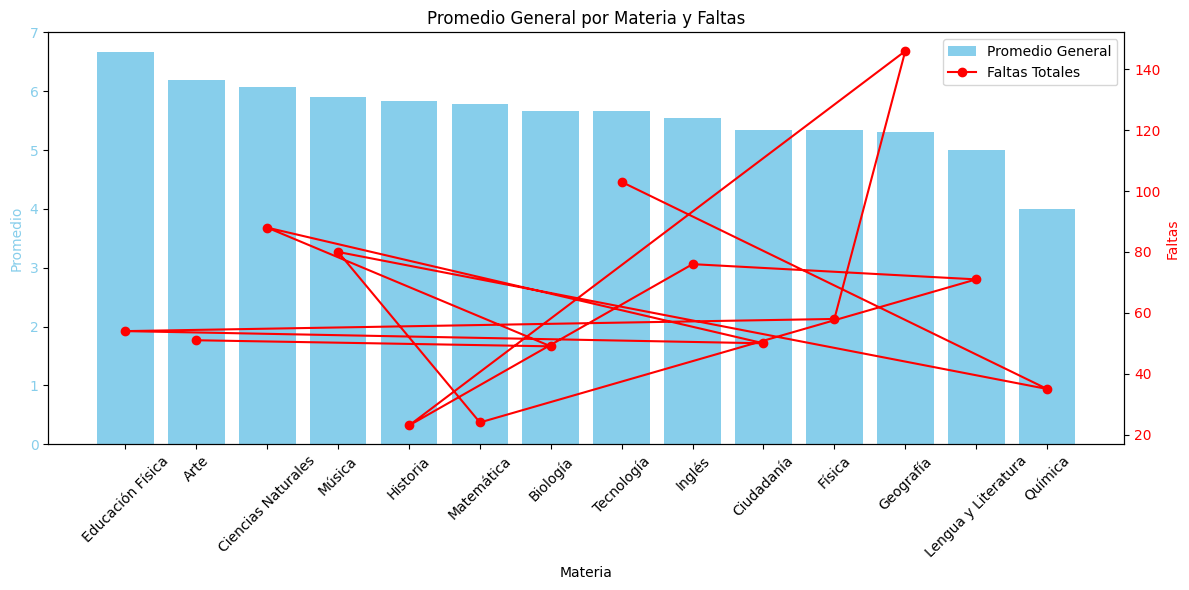

In [2]:

# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Arte', 'Música', 'Tecnología', 'Ciudadanía']

# Función para generar datos aleatorios
def generar_datos(num_filas):
    datos = []
    for _ in range(num_filas):
        apellido = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(8))
        nombre = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(7))
        nro_dni = random.randint(10000000, 99999999)
        materia = random.choice(materias)
        nota1 = random.randint(1,10)
        nota2 = random.randint(1,10)
        nota3 = random.randint(1,10)
        faltas = random.randint(0, 20)

        datos.append([apellido,nombre,nro_dni, materia, nota1, nota2, nota3, faltas])
    return datos

# Generar 100 filas de datos
num_filas = 100
datos = generar_datos(num_filas)


# Crear el DataFrame
df = pd.DataFrame(datos, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Mostrar el DataFrame
print(df.head(20)) # Muestra las primeras 20 filas del DataFrame
print(df.tail(20)) # Muestra las ultimas 20 filas del DataFrame



# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para los promedios
ax1.bar(promedios_ordenados.index, promedios_ordenados.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas')
ax1.tick_params(axis='x', rotation=45)


# Segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


# Mostrar el gráfico
plt.tight_layout()
plt.show()



# prompt: df.to_csv("datos_alumnos.csv", index=False)

df.to_csv("datos_alumnos.csv", index=False)
